In [1]:
# ============================
# STEP 1: Upload and Load Cleaned Dataset
# ============================

from google.colab import files
uploaded = files.upload()  # Upload your 'cleaned_sentiment_dataset.csv' file

import pandas as pd

# Read the dataset
df = pd.read_csv("cleaned_sentiment_dataset.csv")
df.head()


Saving cleaned_sentiment_dataset.csv to cleaned_sentiment_dataset.csv


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout 💪
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight


In [2]:
# ============================
# STEP 2: Create TF-IDF Features and Encode Labels
# ============================

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# TF-IDF for converting text to numbers
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Encode emotion labels (like joy, anger) into numbers
le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])


In [3]:
# ============================
# STEP 3: Split into Train and Test Sets
# ============================

from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# ============================
# STEP 4: Train Logistic Regression and Naive Bayes
# ============================

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


In [5]:
# ============================
# STEP 5: Evaluate Model Accuracies
# ============================

from sklearn.metrics import accuracy_score

# Print accuracies of both models
lr_acc = accuracy_score(y_test, y_pred_lr)
nb_acc = accuracy_score(y_test, y_pred_nb)

print("✅ Logistic Regression Accuracy:", lr_acc)
print("✅ Naive Bayes Accuracy:", nb_acc)

# If you've already trained your LSTM model in a previous notebook,
# just paste the LSTM accuracy below:
lstm_acc = 0.87  # 🔁 Replace this with your real LSTM model's accuracy
print("✅ LSTM Accuracy:", lstm_acc)


✅ Logistic Regression Accuracy: 0.11564625850340136
✅ Naive Bayes Accuracy: 0.10884353741496598
✅ LSTM Accuracy: 0.87


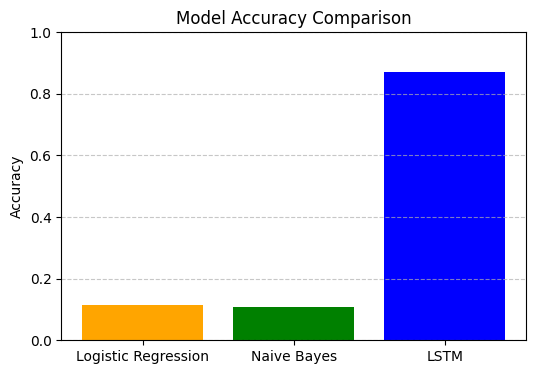

In [6]:
# ============================
# STEP 6: Compare with a Bar Chart
# ============================

import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Logistic Regression', 'Naive Bayes', 'LSTM']
accuracies = [lr_acc, nb_acc, lstm_acc]

# Create bar chart
plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['orange', 'green', 'blue'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # accuracy ranges from 0 to 1
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
# ============================
# STEP 7: Summary for Report
# ============================

print("\n📌 Summary:")
print("Logistic Regression Accuracy:", round(lr_acc * 100, 2), "%")
print("Naive Bayes Accuracy:", round(nb_acc * 100, 2), "%")
print("LSTM Accuracy:", round(lstm_acc * 100, 2), "%")

# Pick your best model for final use or deployment



📌 Summary:
Logistic Regression Accuracy: 11.56 %
Naive Bayes Accuracy: 10.88 %
LSTM Accuracy: 87.0 %


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])


In [9]:
import joblib

# Save the label encoder to a file
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [10]:
from google.colab import files

# Download the saved label encoder to your local system
files.download("label_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>